# 1. 文件夹操作, 保证文件存在

## 1.1 读取json文件

In [1]:
import os
import shutil
import json
import glob

def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# 用法示例
file_path = '/home/joshua/Projects/dataset/Diffusion_data/farl_brute_cosine_nn_map_celeba.json'  # 替换为你的 JSON 文件路径
json_data = read_json_file(file_path)
print('待操作文件数:',len(json_data))

待操作文件数: 30000


## 1.2 文件夹操作, 将原始celebAHQ的文件转换为以下文件列表的形式并存在新的文件夹中:

```
|-real dataset
    |-0
        |-0.jpg
    |-1
        |-1.jpg
    |-2
        |-2.jpg
    |-3
        |-3.jpg
        .
        .
        .
```

In [20]:
# original path to load
ori_real_folder = "/home/joshua/Projects/dataset/CelebAMask-HQ/data"

# folder path to save
new_real_folder = '/home/joshua/Projects/dataset/Diffusion_data/real_dataset'
os.makedirs(real_dataset_folder, exist_ok=True)

for real_file, _ in json_data.items():
#     print(real_file, fake_file)
    source_path = os.path.join(ori_real_folder, real_file)
    real_fold = real_file.replace('.jpg', '')
    REAL_path = os.path.join(new_real_folder, real_fold)
    os.makedirs(REAL_path, exist_ok=True)
    
    destination_path = os.path.join(REAL_path, real_file)
    shutil.copy(source_path, destination_path)

# 2. 匿名化操作

## 2.1 读取json文件

In [1]:
import os
import shutil
import json
import glob

def read_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# 用法示例
file_path = '/home/joshua/Projects/dataset/Diffusion_data/farl_brute_cosine_nn_map_celeba.json'  # 替换为你的 JSON 文件路径
json_data = read_json_file(file_path)
print('待操作文件数:',len(json_data))

待操作文件数: 30000


In [2]:
json_data['3.jpg']

'fake_dataset/image_5789'

In [3]:
# 对字典按键进行排序，并构建新的有序字典
sorted_data = {}
for i in range(len(json_data)):
    new_key = f"{i}.jpg"
    sorted_data[new_key] = json_data[new_key]
    
sorted_data

{'0.jpg': 'fake_dataset/image_9000',
 '1.jpg': 'fake_dataset/image_3426',
 '2.jpg': 'fake_dataset/image_9760',
 '3.jpg': 'fake_dataset/image_5789',
 '4.jpg': 'fake_dataset/image_6966',
 '5.jpg': 'fake_dataset/image_2759',
 '6.jpg': 'fake_dataset/image_1273',
 '7.jpg': 'fake_dataset/image_0349',
 '8.jpg': 'fake_dataset/image_9879',
 '9.jpg': 'fake_dataset/image_0089',
 '10.jpg': 'fake_dataset/image_9357',
 '11.jpg': 'fake_dataset/image_4448',
 '12.jpg': 'fake_dataset/image_5233',
 '13.jpg': 'fake_dataset/image_3848',
 '14.jpg': 'fake_dataset/image_6067',
 '15.jpg': 'fake_dataset/image_9983',
 '16.jpg': 'fake_dataset/image_0349',
 '17.jpg': 'fake_dataset/image_1444',
 '18.jpg': 'fake_dataset/image_6411',
 '19.jpg': 'fake_dataset/image_4448',
 '20.jpg': 'fake_dataset/image_5824',
 '21.jpg': 'fake_dataset/image_4341',
 '22.jpg': 'fake_dataset/image_0022',
 '23.jpg': 'fake_dataset/image_8850',
 '24.jpg': 'fake_dataset/image_5742',
 '25.jpg': 'fake_dataset/image_2177',
 '26.jpg': 'fake_datas

## 2.2 准备数据集对

In [4]:
real_folder_path = '/home/joshua/Projects/dataset/Diffusion_data/real_dataset'
fake_folder_path = '/home/joshua/Projects/dataset/Diffusion_data/fake_dataset'

real_path_list = []
fake_path_list = []

random_choose = False
total_items = 10  # 选取张数

if random_choose:
    json_file = json_data
else:
    json_file = sorted_data

count = 0

for real_file, fake_file in json_file.items():
    if count < total_items:
        real_fold = real_file.replace('.jpg', '')
        real_path = os.path.join(real_folder_path, real_fold)
        real_path_list.append(real_path)
        split_strings = fake_file.split('/') # 拆开字符串
        fake_fold = split_strings[-1] # 获取最后一个子字符串
        fake_path = os.path.join(fake_folder_path, fake_fold)
        fake_path_list.append(fake_path)
#         print(real_path)
        count = count+1
    else:
        break

In [5]:
print(real_path_list)
print(fake_path_list)

['/home/joshua/Projects/dataset/Diffusion_data/real_dataset/0', '/home/joshua/Projects/dataset/Diffusion_data/real_dataset/1', '/home/joshua/Projects/dataset/Diffusion_data/real_dataset/2', '/home/joshua/Projects/dataset/Diffusion_data/real_dataset/3', '/home/joshua/Projects/dataset/Diffusion_data/real_dataset/4', '/home/joshua/Projects/dataset/Diffusion_data/real_dataset/5', '/home/joshua/Projects/dataset/Diffusion_data/real_dataset/6', '/home/joshua/Projects/dataset/Diffusion_data/real_dataset/7', '/home/joshua/Projects/dataset/Diffusion_data/real_dataset/8', '/home/joshua/Projects/dataset/Diffusion_data/real_dataset/9']
['/home/joshua/Projects/dataset/Diffusion_data/fake_dataset/image_9000', '/home/joshua/Projects/dataset/Diffusion_data/fake_dataset/image_3426', '/home/joshua/Projects/dataset/Diffusion_data/fake_dataset/image_9760', '/home/joshua/Projects/dataset/Diffusion_data/fake_dataset/image_5789', '/home/joshua/Projects/dataset/Diffusion_data/fake_dataset/image_6966', '/home/j

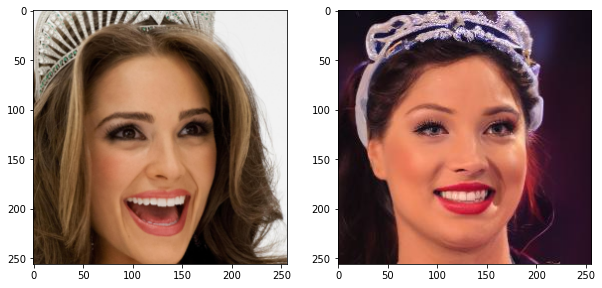

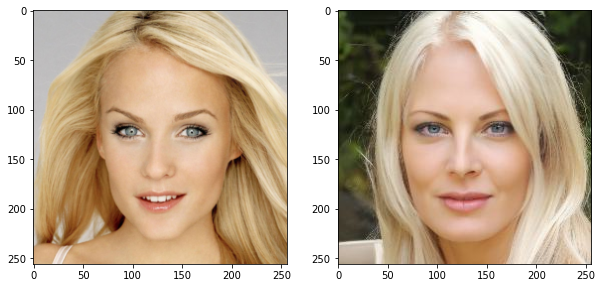

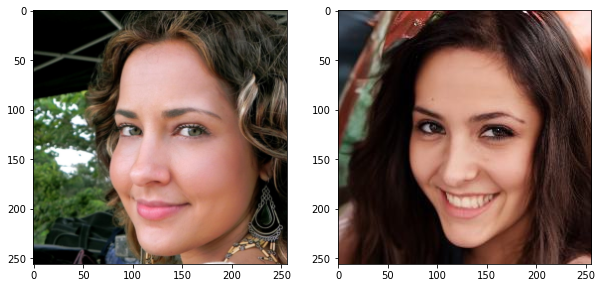

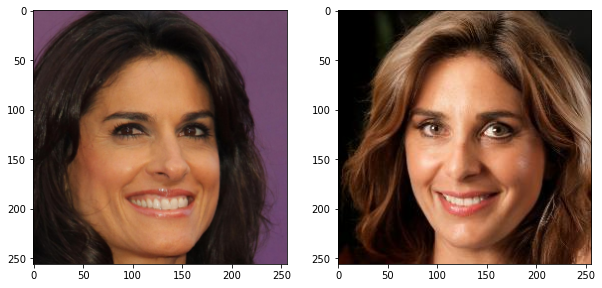

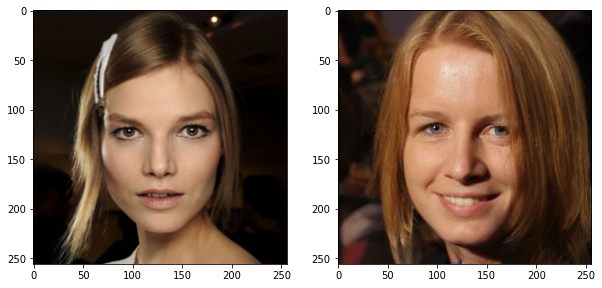

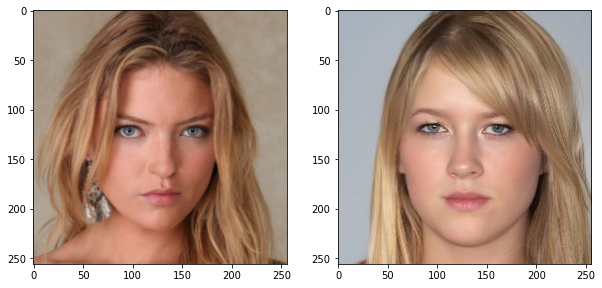

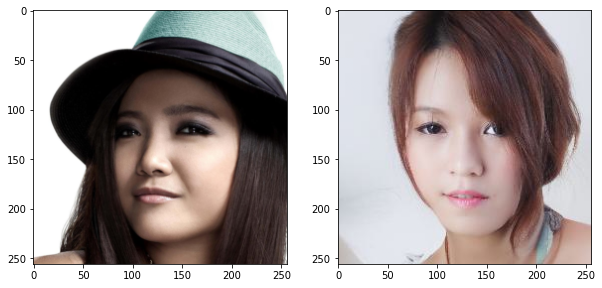

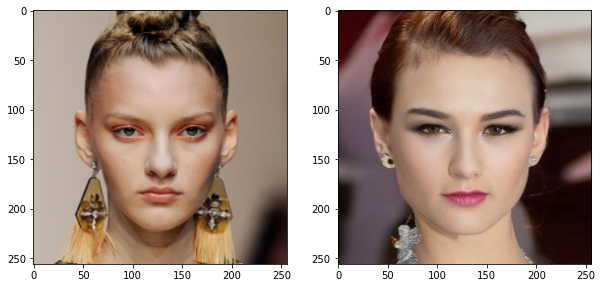

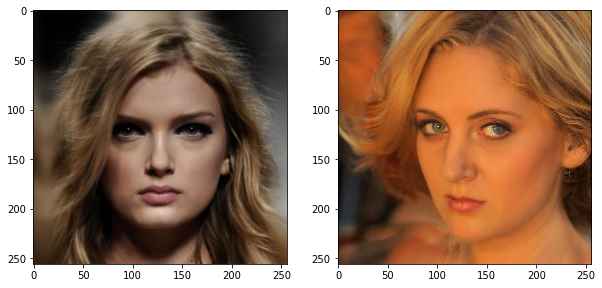

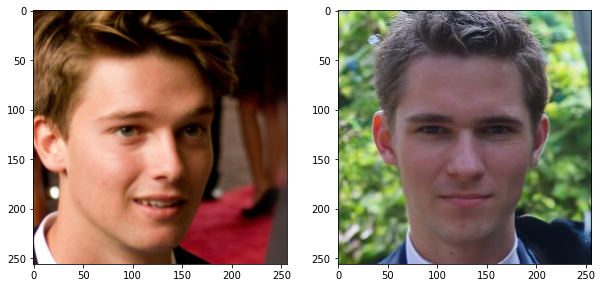

In [6]:
from PIL import Image
from templates import *
import matplotlib.pyplot as plt

for i in range(len(fake_path_list)):
    real_data = ImageDataset(real_path_list[i], image_size=256, exts=['jpg', 'JPG', 'png'], do_augment=False)
    real_image = real_data[0]['img'][None]
    Real_image = (real_image + 1) / 2
    fake_data = ImageDataset(fake_path_list[i], image_size=256, exts=['jpg', 'JPG', 'png'], do_augment=False)
    fake_image = fake_data[0]['img'][None]
    Fake_image = (fake_image + 1) / 2
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(Real_image[0].permute(1, 2, 0).cpu())
    ax[1].imshow(Fake_image[0].permute(1, 2, 0).cpu())

In [10]:
real_data[0]['img'][None]

tensor([[[[ 0.8824,  0.8824,  0.8824,  ...,  0.8745,  0.8745,  0.8745],
          [ 0.8824,  0.8824,  0.8824,  ...,  0.8745,  0.8745,  0.8745],
          [ 0.8824,  0.8824,  0.8824,  ...,  0.8667,  0.8745,  0.8745],
          ...,
          [-0.5059, -0.5608, -0.5765,  ..., -0.3255, -0.2863, -0.2706],
          [-0.5765, -0.5059, -0.5137,  ..., -0.0745, -0.0275,  0.0431],
          [-0.4510, -0.4275, -0.3882,  ..., -0.1765, -0.1765, -0.1294]],

         [[ 0.8824,  0.8824,  0.8824,  ...,  0.8745,  0.8745,  0.8745],
          [ 0.8824,  0.8824,  0.8824,  ...,  0.8745,  0.8745,  0.8745],
          [ 0.8824,  0.8824,  0.8824,  ...,  0.8667,  0.8745,  0.8745],
          ...,
          [-0.6549, -0.7098, -0.7255,  ..., -0.4980, -0.4588, -0.4431],
          [-0.7176, -0.6471, -0.6549,  ..., -0.2392, -0.1922, -0.1216],
          [-0.5922, -0.5686, -0.5294,  ..., -0.3569, -0.3569, -0.3098]],

         [[ 0.8824,  0.8824,  0.8824,  ...,  0.8745,  0.8745,  0.8745],
          [ 0.8824,  0.8824,  

## 2.3 读取并优化

In [45]:
import torch
from torchvision.utils import save_image
from templates import *
from templates_cls import *
from experiment_classifier import ClsModel
import clip
from PIL import Image

import sys
sys.path.append('/home/joshua/Projects/diffae/disentanglement/')
from Losses import id_loss

device ="cuda" if torch.cuda.is_available() else "cpu"

#----------------Load diffusion model----------------------#
Diff_conf = ffhq256_autoenc()
# print(Diff_conf.name)
Diff_model = LitModel(Diff_conf)
Diff_state = torch.load(f'checkpoints/{Diff_conf.name}/last.ckpt', map_location='cpu')
Diff_model.load_state_dict(Diff_state['state_dict'], strict=False)
Diff_model.ema_model.to(device)
Diff_model.ema_model.eval()

#----------------Load FaRL and Arcface model----------------------#
FaRL_model, preprocess = clip.load("ViT-B/16", device="cpu")
FaRL_model = FaRL_model.to(device)
FaRL_state=torch.load("FaRL/checkpoints/FaRL-Base-Patch16-LAIONFace20M-ep64.pth") # you can download from https://github.com/FacePerceiver/FaRL#pre-trained-backbones
FaRL_model.load_state_dict(FaRL_state["state_dict"],strict=False)

BASE_PATH = '/home/joshua/Projects/diffae/disentanglement/'
E_ID_LOSS_PATH = BASE_PATH + 'CNN-project-weights/model_ir_se50.pth'
Arc_model = id_loss.IDLoss(E_ID_LOSS_PATH)
Arc_model = Arc_model.to(device)

Global seed set to 0


Model params: 160.69 M
Loading ResNet ArcFace


In [46]:
import torchvision.transforms as transforms

def cosine_distance(x_A, x_R, m):
    # Calculate cosine similarity
    cos_sim = torch.dot(x_A, x_R) / (torch.norm(x_A) * torch.norm(x_R))
    # Calculate absolute difference with m
    abs_diff = torch.abs(cos_sim - m)
    return abs_diff

def l1_distance(x_A, x_R):
    # Calculate L1 distance
    diff = x_A - x_R
    dist = torch.norm(diff, p=1)
    return dist

def _convert_image_to_rgb(image):
    return image.convert("RGB")

FaRL_transform0 = transforms.Compose([
    transforms.Resize(size=224, interpolation=transforms.InterpolationMode.BICUBIC),
    transforms.CenterCrop(size=224),
    transforms.Normalize(mean=(0.48145466, 0.4578275, 0.40821073), 
                         std=(0.26862954, 0.26130258, 0.27577711))
])

In [55]:
anon_folder_path = '/home/joshua/Projects/dataset/Diffusion_data/anon_dataset'
os.makedirs(anon_folder_path, exist_ok=True)

In [52]:
from torch.autograd import Variable

lr_id = 0.005               # image id learning rate
lr_attribute = 0.001       # image attribute learning rate

T = 2                     # process step number for diffusion model
iter_number = 10           # iteration number for optimization

# set m in range [0,1], 0 indicates the max distance in ID Space, 1 or 0.9 indicate the min distance in ID Space.
m = 0
        
for i in range(len(fake_path_list)):
    # 0.0 Data to process
    real_data = ImageDataset(real_path_list[i], image_size=256, exts=['jpg', 'JPG', 'png'], do_augment=False)
    fake_data = ImageDataset(fake_path_list[i], image_size=256, exts=['jpg', 'JPG', 'png'], do_augment=False)
    
    if not fake_data or not real_data:
        print('check the data path, fake_data or real_data do not exists!!')
        break
    else:
        anon_save_path = os.path.join(anon_folder_path, str(i))
        os.makedirs(anon_save_path, exist_ok=True)
        
        real_batch = real_data[0]['img'][None]
        real_image = real_batch.cuda()    # (range:[-1,1]; size:[1,3,256,256])

        fake_batch = fake_data[0]['img'][None]
        fake_image = fake_batch.cuda()    # (range:[-1,1]; size:[1,3,256,256])

        # Real Data
        Real_image = (real_image + 1) / 2 # (range:[0,1]; size:[1,3,256,256])

        # Collect arcface gradient information here
        with torch.no_grad():
            Real_ID_Feat = Arc_model.extract_feats(Real_image)

        # Collect FaRL gradient information here
        with torch.no_grad():
            FaRL_Patch_Real_image = FaRL_model.visual.conv1(FaRL_transform0(Real_image))  # torch.Size([1, 768, 14, 14])

        FaRL_Patch_Real_image_Flatten = FaRL_Patch_Real_image.view(1, -1)

        # 0.1 Fake Data
        with torch.no_grad():
            # no gradient info in this step, cause these tensor do not used to calculate while optimization
            semantic_vec = Diff_model.encode(fake_image)
            xT = Diff_model.encode_stochastic(fake_image, semantic_vec, T=T)
            Fake_image = Diff_model.render(xT, semantic_vec, T=T)  # (range:[0,1]; size:[1,3,256,256])

        # 0.2 Variable used to optimization. `require gradient` set to true
        semantic_optimization = Variable(semantic_vec, requires_grad = True)  

        # loop
        print('Optimization start for:', fake_path_list[i])
        for j in range(10):
            # 0.3 Collect generator gradient information here
            Fake_image_optimization = Diff_model.render(xT, semantic_optimization, T=T)

            Fake_ID_Feat = Arc_model.extract_feats(Fake_image_optimization)
            ArcFace_Loss = cosine_distance(Real_ID_Feat[0], Fake_ID_Feat[0], m)

            FaRL_Patch_Fake_image = FaRL_model.visual.conv1(FaRL_transform0(Fake_image_optimization))  # torch.Size([1, 768, 14, 14])
            FaRL_Patch_Fake_image_Flatten = FaRL_Patch_Fake_image.view(1, -1)
            FaRL_Patch_Loss = l1_distance(FaRL_Patch_Real_image_Flatten, FaRL_Patch_Fake_image_Flatten)
            
            
            Total_loss = ArcFace_Loss + lr_attribute * FaRL_Patch_Loss
            
            # 0.6 set all nets gradient to zero before backpropagation
            Diff_model.zero_grad()
            Arc_model.zero_grad()
            FaRL_model.zero_grad()

            # 0.7 partial derivative at ID
            semantic_optimization.retain_grad() # gradient reatin on semantic_optimization
            Total_loss.backward(retain_graph=True)   # partial derivative at ID

            # update semantic_optimization with ID loss
            semantic_optimization = semantic_optimization - lr_id*torch.sign(semantic_optimization.grad)

#             # loop
#             # 0.8 partial derivative at Attributes
#             Diff_model.zero_grad()
#             Arc_model.zero_grad()
#             FaRL_model.zero_grad()

#             semantic_optimization.retain_grad() # gradient reatin on semantic_optimization
#             FaRL_Patch_Loss.backward()   # partial derivative at Attributes

#             # update semantic_optimization with Attribute loss
#             semantic_optimization = semantic_optimization - lr_attribute*torch.sign(semantic_optimization.grad)
            
            
            print("Total_loss", Total_loss, "ID Loss:", ArcFace_Loss, "ATTR Loss:", FaRL_Patch_Loss)
        
        print('Optimization end for:', fake_path_list[i])
        with torch.no_grad():
            Fake_image_optimization = Diff_model.render(xT, semantic_optimization, T=T)

        Anonymization_Image = Fake_image_optimization[0].permute(1, 2, 0).cpu()

        # 将图像转换为PIL Image对象
        anon_image = Image.fromarray((Anonymization_Image * 255).numpy().astype('uint8'))

        # 保存图像为文件
        output_name = str(i)+'.jpg'
        output_file = os.path.join(anon_save_path, output_name)  # 输出图像文件路径
        anon_image.save(output_file)
        print("图像保存完成:",output_name)

RuntimeError: CUDA out of memory. Tried to allocate 16.00 MiB (GPU 0; 9.78 GiB total capacity; 7.54 GiB already allocated; 8.69 MiB free; 7.59 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF